In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Wczytanie pliku tekstowego z listą stop words
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = [word.strip() for word in file.readlines()]
    return stop_words

# Ścieżka do pliku tekstowego z listą stop words
stop_words_file = 'Stopwords.txt'

# Wczytanie listy stop words z pliku
my_stop_words = load_stop_words(stop_words_file)

# Wczytanie danych z pliku Excel
df = pd.read_excel('Tweet Tracker.xlsx')


In [2]:
# df.head(500)

In [3]:
# # Pobieranie modelu języka polskiego w Spacy
# !python -m spacy download pl_core_news_md

# # Załadowanie modelu języka polskiego
nlp = spacy.load('pl_core_news_md')

In [4]:
def clean_tweet(tweet):
    
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    
    # Tokenizacja tekstu na słowa
    tokens = word_tokenize(tweet)
    # Usunięcie znaków interpunkcyjnych i przekształcenie słów na małe litery
    words = [word.lower() for word in tokens if word.isalpha()]
    # Usunięcie stop words
    words = [word for word in words if word not in my_stop_words]
    # Analiza części mowy dla słów
    lemmas = []
    doc = nlp(' '.join(words))
    for token in doc:
        # Wybieramy tylko rzeczowniki (NOUN), czasowniki (VERB) i przymiotniki (ADJ)
        if token.pos_ in ['NOUN', 'VERB', 'ADJ']:
            lemmas.append(token.lemma_)
    
    # Połączenie lematów w jednozdaniowy tekst
    cleaned_tweet = ' '.join(lemmas)
    return cleaned_tweet

# Stworzenie nowej kolumny z wyczyszczonymi tweetami
df['CLEANED_TEXT'] = df['TEXT'].apply(clean_tweet)

# Wyświetlenie wyczyszczonych tweetów
# df.head(500)

In [5]:
# Tworzenie listy słów z oczyszczonych tweetów
all_words = ' '.join(df['CLEANED_TEXT']).split()

# Obliczanie częstości słów
word_freq = Counter(all_words)

# Wyświetlanie najczęściej występujących słów
for word, frequency in word_freq.most_common(100):
    print(f'{word}: {frequency}')

socjal: 139
pracować: 123
zasiłek: 108
biedny: 85
chcieć: 85
mieć: 84
polski: 83
rząd: 82
imigrant: 81
pracownik: 80
program: 78
rodzina: 77
sejm: 76
zatrudniać: 74
wydać: 73
państwo: 73
bochenek: 72
biuro: 72
poselski: 72
wyjaśnić: 72
niedopatrzenie: 72
człowiek: 71
społeczny: 71
praca: 62
dziecko: 61
ubóstwo: 59
świadczenie: 58
być: 56
pobierać: 49
płacić: 47
minister: 47
wiedzieć: 46
dostawać: 45
podatek: 45
polityka: 43
rok: 43
kraj: 40
pogrzebowy: 36
francja: 35
waloryzacja: 35
nowy: 34
likwidacja: 33
projekt: 33
ustawa: 33
powód: 32
ostatni: 31
duży: 31
posiadać: 29
mówić: 28
obywatel: 28
biedn: 28
rodzic: 28
sam: 27
wysokość: 27
deficyt: 27
świadczyć: 27
budżet: 27
głosowanie: 27
życie: 26
styczeń: 26
procedura: 26
nadmierny: 26
edp: 26
bezrobotny: 25
problem: 25
wypłacać: 24
móc: 24
podnieść: 24
intel: 24
uwaga: 23
chodzić: 22
pieniądz: 22
należeć: 21
wicemarszałek: 21
współpracownik: 21
asys: 21
pomoc: 21
zmiana: 21
eurokolchóz: 21
robić: 20
zrobić: 20
pamiętać: 20
sondapo: 20

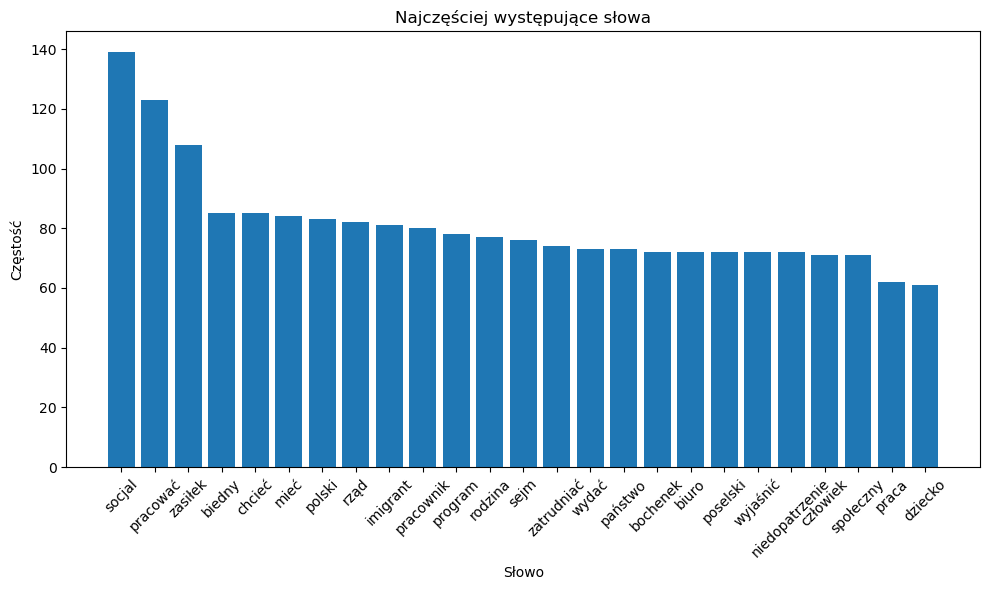

In [6]:
# Wybranie 25 najczęściej występujących słów
top_words = word_freq.most_common(25)

# Przygotowanie danych do wykresu
words = [word for word, _ in top_words]
frequencies = [freq for _, freq in top_words]

# Wygenerowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Słowo')
plt.ylabel('Częstość')
plt.title('Najczęściej występujące słowa')
plt.xticks(rotation=45)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

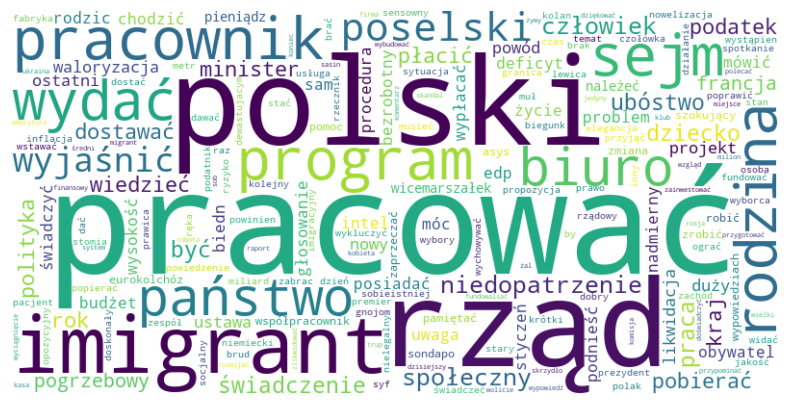

In [24]:
# Lista słów do usunięcia
words_to_remove = ['biedny', 'socjal','zasiłek','mieć','chcieć', "bochenek", "zatrudniać"]

# Usunięcie słów z word_freq
word_freq_cleaned = {word: freq for word, freq in word_freq.items() if word not in words_to_remove}

# Generowanie chmury słów z oczyszczonymi częstościami słów
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_cleaned)

# Wyświetlanie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Podział listy częstości słów na podstawie części mowy
pos_freq = {}
for word, freq in word_freq.items():
    pos = nltk.pos_tag([word])[0][1]  # Analiza części mowy dla słowa
    if freq >= 3:  # Warunek częstotliwości >= 3
        if pos in pos_freq:
            pos_freq[pos][word] = freq
        else:
            pos_freq[pos] = {word: freq}

# Wyświetlanie częstości słów dla każdej części mowy o częstotliwości >= 3
for pos, freq in pos_freq.items():
    print(f'--- {pos} ---')
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)  # Sortowanie według częstości
    for word, frequency in sorted_freq:
        print(f'{word}: {frequency}')
    print('\n')

--- NN ---
socjal: 139
pracować: 123
zasiłek: 108
biedny: 85
chcieć: 85
mieć: 84
polski: 83
rząd: 82
imigrant: 81
pracownik: 80
program: 78
rodzina: 77
sejm: 76
zatrudniać: 74
wydać: 73
państwo: 73
bochenek: 72
biuro: 72
poselski: 72
wyjaśnić: 72
niedopatrzenie: 72
człowiek: 71
społeczny: 71
praca: 62
dziecko: 61
ubóstwo: 59
świadczenie: 58
być: 56
pobierać: 49
płacić: 47
minister: 47
wiedzieć: 46
dostawać: 45
podatek: 45
polityka: 43
rok: 43
kraj: 40
pogrzebowy: 36
francja: 35
waloryzacja: 35
nowy: 34
likwidacja: 33
projekt: 33
ustawa: 33
powód: 32
ostatni: 31
duży: 31
posiadać: 29
mówić: 28
obywatel: 28
biedn: 28
rodzic: 28
sam: 27
wysokość: 27
deficyt: 27
świadczyć: 27
budżet: 27
głosowanie: 27
życie: 26
styczeń: 26
procedura: 26
nadmierny: 26
edp: 26
bezrobotny: 25
problem: 25
wypłacać: 24
móc: 24
podnieść: 24
intel: 24
uwaga: 23
chodzić: 22
pieniądz: 22
należeć: 21
wicemarszałek: 21
współpracownik: 21
asys: 21
pomoc: 21
zmiana: 21
eurokolchóz: 21
robić: 20
zrobić: 20
pamiętać: 20


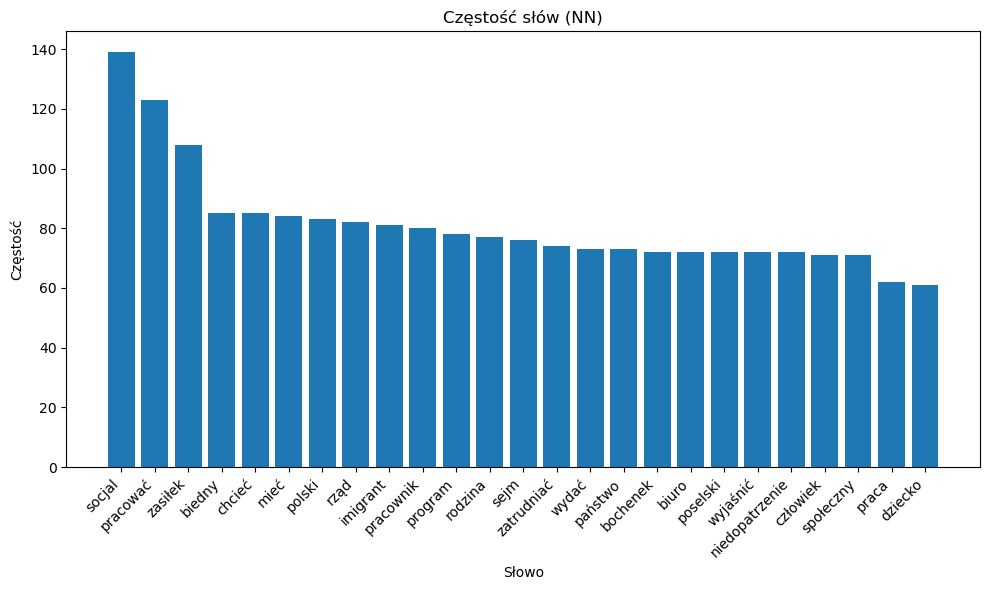

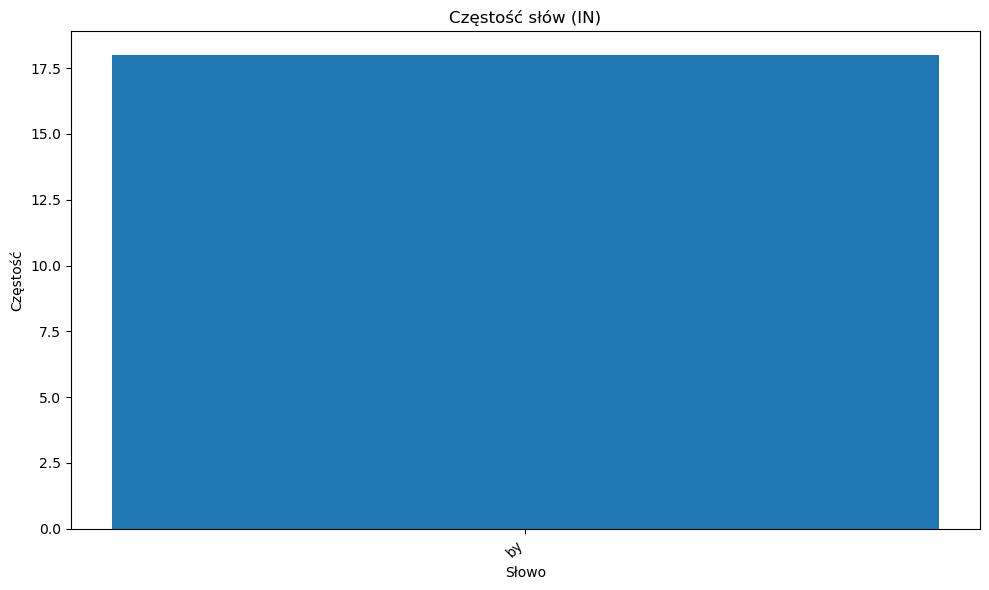

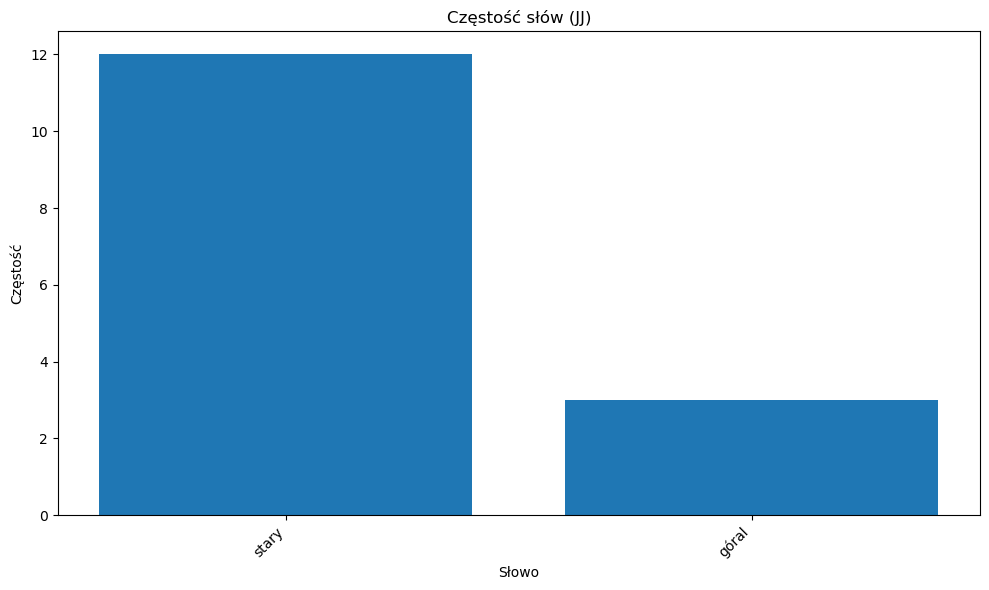

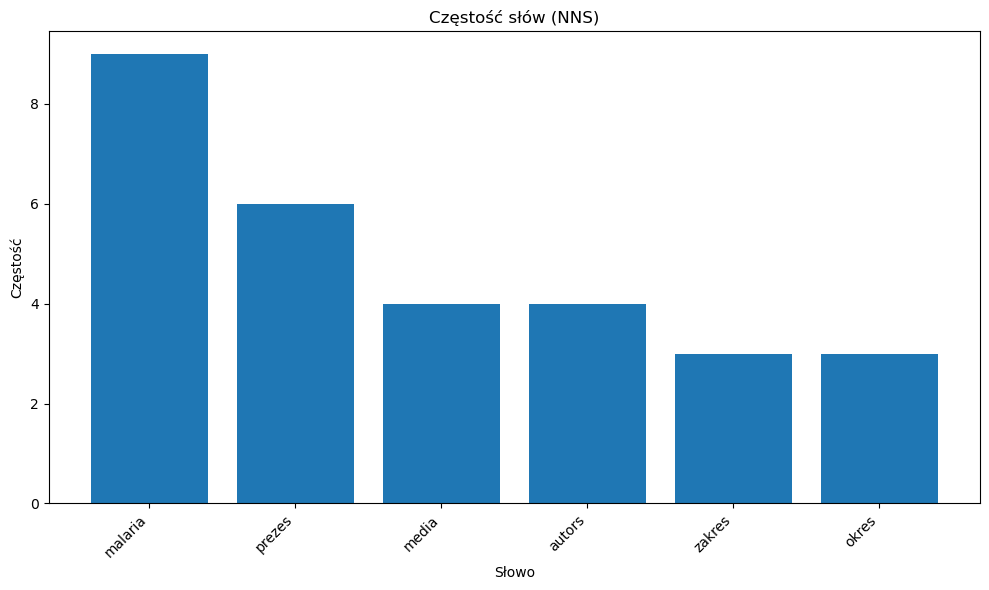

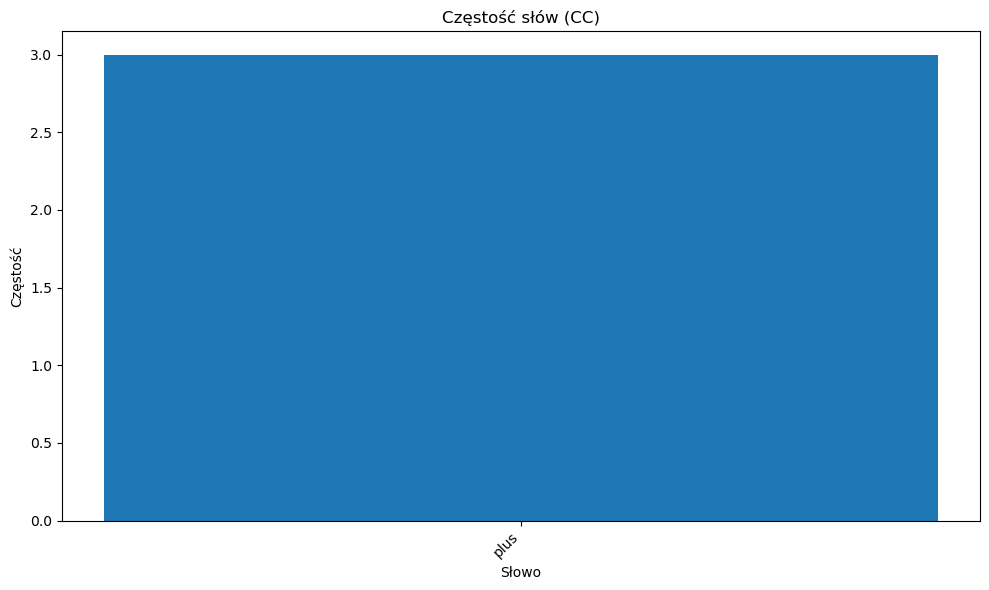

In [9]:
# Wygenerowanie wykresów dla każdej części mowy
for pos, freq in pos_freq.items():
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)  # Sortowanie według częstości
    words = [word for word, _ in sorted_freq[:25]]  # Wybór najczęstszych 25 słów
    frequencies = [frequency for _, frequency in sorted_freq[:25]]

    # Wygenerowanie wykresu słupkowego dla danej części mowy
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Słowo')
    plt.ylabel('Częstość')
    plt.title(f'Częstość słów ({pos})')
    plt.xticks(rotation=45, ha='right')  # Skrócenie etykiet i obrót o 45 stopni
    plt.tight_layout()

    # Wyświetlenie wykresu
    plt.show()

In [10]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['CLEANED_TEXT'].apply(getSubjectivity)
df['Polarity'] = df['CLEANED_TEXT'].apply(getPolarity)

df.head(5)

,URL,USER,TEXT,CLEANED_TEXT,Subjectivity,Polarity
0,https://twitter.com/AnnaBurnosN1/status/167654...,mazureusz,@rocnat Popierają socjal?,popierać,0.0,0.0
1,https://twitter.com/Maciej81813761/status/1676...,Maciej81813761,@PEmeryt @marsza_jacek Raczej to Pan błądzi ni...,błądzić odróżniać sprawca ofiara migrant ofiar...,0.0,0.0
2,https://twitter.com/Maciej81813761/status/1676...,Cezary_Dalek,"RT @winatuska1: Jeżeli Wicemarszałek Sejmu, Ry...",wicemarszałek sejm posiadać współpracownik asy...,0.0,0.0
3,https://twitter.com/Maciej81813761/status/1676...,ZyjeI,Jaki to ma sens? \nGłówny argument o tworzeniu...,sens główny argument tworzyć miejsce praca bez...,0.0,0.0
4,https://twitter.com/Maciej81813761/status/1676...,MalgoPiasecka,@KacperBomba2 @Andrzej31263190 No i tutaj poru...,poruszić ważny temat kraj rządzić religia kons...,0.0,0.0


In [11]:
def getAnalysis(score):
    if score <0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Analysis"] = df['Polarity'].apply(getAnalysis)
df.head(5)

,URL,USER,TEXT,CLEANED_TEXT,Subjectivity,Polarity,Analysis
0,https://twitter.com/AnnaBurnosN1/status/167654...,mazureusz,@rocnat Popierają socjal?,popierać,0.0,0.0,Neutral
1,https://twitter.com/Maciej81813761/status/1676...,Maciej81813761,@PEmeryt @marsza_jacek Raczej to Pan błądzi ni...,błądzić odróżniać sprawca ofiara migrant ofiar...,0.0,0.0,Neutral
2,https://twitter.com/Maciej81813761/status/1676...,Cezary_Dalek,"RT @winatuska1: Jeżeli Wicemarszałek Sejmu, Ry...",wicemarszałek sejm posiadać współpracownik asy...,0.0,0.0,Neutral
3,https://twitter.com/Maciej81813761/status/1676...,ZyjeI,Jaki to ma sens? \nGłówny argument o tworzeniu...,sens główny argument tworzyć miejsce praca bez...,0.0,0.0,Neutral
4,https://twitter.com/Maciej81813761/status/1676...,MalgoPiasecka,@KacperBomba2 @Andrzej31263190 No i tutaj poru...,poruszić ważny temat kraj rządzić religia kons...,0.0,0.0,Neutral


In [12]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['CLEANED_TEXT'][i])
        print()
        j=j+1

1) przyjmować imigrant pracować płacić podatek brać sociale mieć zapierdalać super pomysł dom oddać biedn

2) obcokrajowiec stanowiać bezrobotny zatrudnić mieć socjal praca zdechąć głód wylądować most

3) potężny raek krytykować super klub wiatr oko trenować biedn grać blaszak chcieć zniszczyć

4) wyzywanie kogos sam doslownie kazdy gowny konfy dawać konfa super problem socjal akceptujecie robić sprzeczny zapowiadać popierać konfy



In [13]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['CLEANED_TEXT'][i])
        print()
        j=j+1

1) zwać stary dekada rządzić socjalista rozbudować socjal granica absurd gwarantować ograniczyć socjal osoba potrzebować napływ imigrant spadnąć połowa połowa

2) turyngia spuscizny stary zjebow popierdolć człowiek chuj faszystowski stary dziadow wkurwiony podział biedny pamiętać jedyny miejsce widzieć być nalejek plakatow fuck afd

3) typical ukrainiec wypierdalać kraj bronić Polska



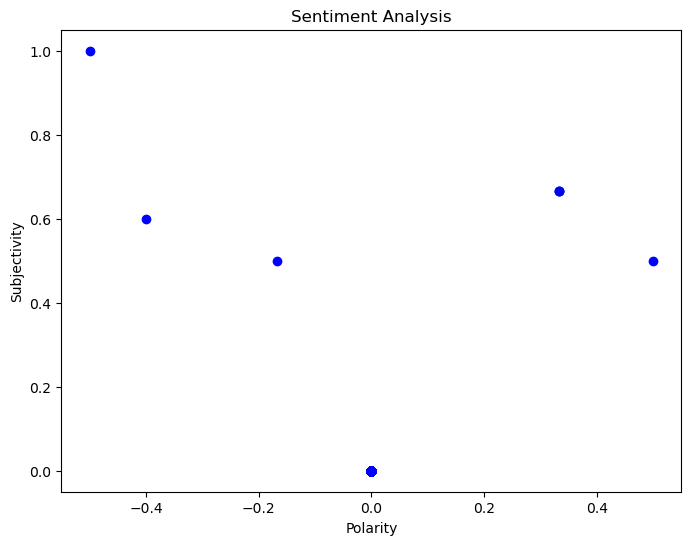

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

0.4

In [16]:
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

0.3

In [17]:
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

99.3

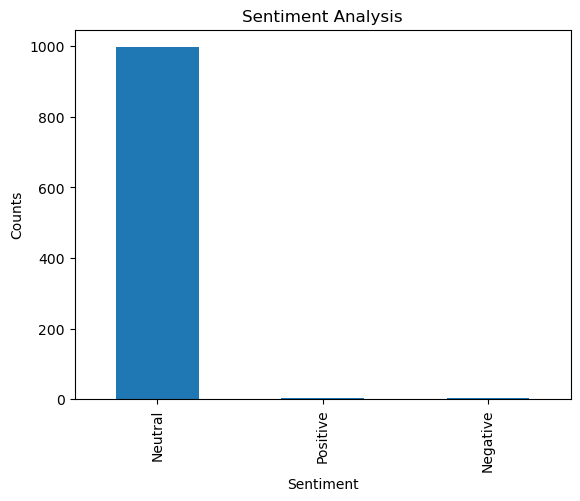

In [18]:
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [19]:
# Połączenie oczyszczonych tweetów w jednozdaniowy tekst
combined_text = ' '.join(df['CLEANED_TEXT'])

# Analiza sentymentu dla całego tekstu tweetów naraz
sentiment = TextBlob(combined_text).sentiment.polarity

# Wyświetlenie sentymentu
print('Sentiment:', sentiment)

Sentiment: 0.06190476190476191
